In [1]:
import pandas as pd
import numpy as np
import os
import typing
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense

In [8]:
DATA_PATH = 'data/'
all_files = os.listdir(DATA_PATH)

In [10]:
all_dataframes = []
for index, file in enumerate(all_files):
    print(f"Reading file: {file}")
    file_name = file.split('.')[0]
    df = pd.read_csv(DATA_PATH + file, sep=';')

    df['date'] = pd.to_datetime(df[file_name], format='%Y-%m-%d %H:%M')
    df = df.drop(columns=[file_name])

    df = df.set_index('date')
    df.columns = [f"{file_name}_{col}" for col in df.columns if col != 'date']
    all_dataframes.append(df)

combined_df = pd.concat(all_dataframes, axis=1)


Reading file: K711.csv
                     K711_02_1  K711_02_2  K711_05_1  K711_05_2  K711_05_3   
date                                                                         
2019-11-01 00:00:00        4.0        9.0       18.0        5.0        5.0  \
2019-11-01 00:15:00        2.0        4.0       10.0        5.0        0.0   
2019-11-01 00:30:00        7.0        5.0       14.0        2.0        2.0   
2019-11-01 00:45:00        4.0        0.0        9.0        0.0        1.0   
2019-11-01 01:00:00        3.0        0.0        6.0        1.0        3.0   
...                        ...        ...        ...        ...        ...   
2019-11-30 22:45:00        7.0        9.0      107.0       73.0       26.0   
2019-11-30 23:00:00        6.0        9.0       55.0       32.0        9.0   
2019-11-30 23:15:00       14.0        8.0       57.0       19.0       13.0   
2019-11-30 23:30:00        5.0        4.0       43.0       22.0       10.0   
2019-11-30 23:45:00        4.0        4.0

In [14]:
combined_df

,K711_02_1,K711_02_2,K711_05_1,K711_05_2,K711_05_3,K711_08_1,K711_08_2,K711_11_1,K711_11_2,K711_11_3,...,K709_11_2,K709_12_1,K709_22_1,K709_25_1,K709_26_1,K709_65_1,K709_65_2,K709_66_1,K709_71_1,K709_71_2
date,,,,,,,,,,,,,,,,,,,,,
2019-11-01 00:00:00,4.0,9.0,18.0,5.0,5.0,9.0,9.0,17.0,37.0,26.0,...,18.0,0.0,0.0,1.0,1.0,25.0,5.0,1.0,43.0,18.0
2019-11-01 00:15:00,2.0,4.0,10.0,5.0,0.0,4.0,6.0,12.0,24.0,15.0,...,8.0,0.0,1.0,1.0,1.0,13.0,2.0,0.0,29.0,7.0
2019-11-01 00:30:00,7.0,5.0,14.0,2.0,2.0,3.0,1.0,12.0,14.0,6.0,...,4.0,0.0,0.0,5.0,5.0,13.0,5.0,1.0,12.0,4.0
2019-11-01 00:45:00,4.0,0.0,9.0,0.0,1.0,2.0,2.0,5.0,16.0,2.0,...,2.0,0.0,0.0,1.0,1.0,9.0,2.0,1.0,18.0,2.0
2019-11-01 01:00:00,3.0,0.0,6.0,1.0,3.0,2.0,2.0,7.0,11.0,0.0,...,1.0,0.0,0.0,4.0,5.0,6.0,3.0,2.0,11.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-11-30 22:45:00,7.0,9.0,107.0,73.0,26.0,17.0,14.0,28.0,67.0,33.0,...,30.0,1.0,5.0,2.0,2.0,124.0,75.0,0.0,72.0,31.0
2019-11-30 23:00:00,6.0,9.0,55.0,32.0,9.0,24.0,15.0,31.0,57.0,27.0,...,29.0,0.0,4.0,4.0,4.0,75.0,21.0,0.0,67.0,29.0
2019-11-30 23:15:00,14.0,8.0,57.0,19.0,13.0,26.0,22.0,40.0,65.0,37.0,...,37.0,1.0,2.0,5.0,6.0,64.0,25.0,1.0,72.0,37.0


In [97]:
#https://colab.research.google.com/drive/1b3CUJuDOmPmNdZFH3LQDmt5F0K3FZhqD?usp=sharing#scrollTo=bY2yEu2QTBXP
def df_to_X_y(data, window_size=5):
  X = []
  y = []
  for i in range(len(data)-window_size):
    row = [[a] for a in data[i:i+window_size]]
    X.append(row)
    label = data[i+window_size]
    y.append(label)
  return np.array(X), np.array(y)

#split and normalize the data
window_size = 10
X, Y = df_to_X_y(data, window_size=window_size)
X.shape

(2870, 10, 1, 7)

Epoch 1/10
503/503 [==============================] - 63s 125ms/step - loss: 0.0178
Epoch 2/10
503/503 [==============================] - 62s 124ms/step - loss: 0.0119
Epoch 3/10
503/503 [==============================] - 61s 120ms/step - loss: 0.0113
Epoch 4/10
503/503 [==============================] - 62s 123ms/step - loss: 0.0107
Epoch 5/10
503/503 [==============================] - 61s 121ms/step - loss: 0.0101
Epoch 6/10
503/503 [==============================] - 59s 118ms/step - loss: 0.0096
Epoch 7/10
503/503 [==============================] - 65s 128ms/step - loss: 0.0091
Epoch 8/10
503/503 [==============================] - 64s 128ms/step - loss: 0.0087
Epoch 9/10
503/503 [==============================] - 64s 127ms/step - loss: 0.0083
Epoch 10/10
126/126 [==============================] - 3s 19ms/step - loss: 0.0075
Test loss: 0.007505445741117001
126/126 [==============================] - 2s 18ms/step


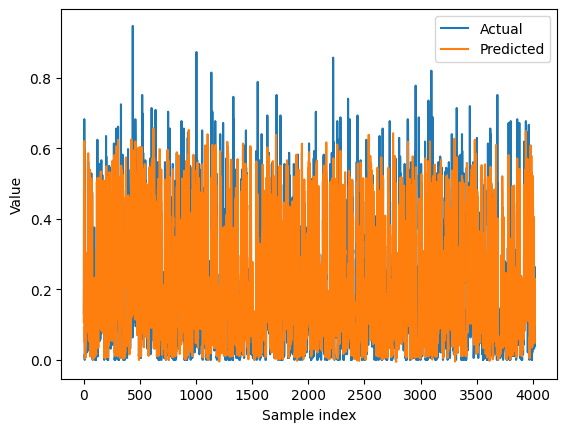

In [98]:


# Split the dataset into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Normalize the data
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train.reshape(-1, window_size)).reshape(-1, window_size, 1)
X_test = scaler.transform(X_test.reshape(-1, window_size)).reshape(-1, window_size, 1)
Y_train = scaler.fit_transform(Y_train.reshape(-1, 1))
Y_test = scaler.transform(Y_test.reshape(-1, 1))

# Define and build the LSTM model
model = Sequential()
model.add(LSTM(units=20, activation='relu', input_shape=(window_size, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model on the training set
model.fit(X_train, Y_train, epochs=10, batch_size=32, verbose=1)

# Evaluate the model on the testing set
loss = model.evaluate(X_test, Y_test)
print(f"Test loss: {loss}")

# Make predictions using the trained model
predictions = model.predict(X_test)
inversed_predictions = scaler.inverse_transform(predictions)

# Visualize the results (e.g., by plotting the actual vs. predicted values)
import matplotlib.pyplot as plt

plt.plot(Y_test, label='Actual')
plt.plot(predictions, label='Predicted')
plt.xlabel('Sample index')
plt.ylabel('Value')
plt.legend()
plt.show()


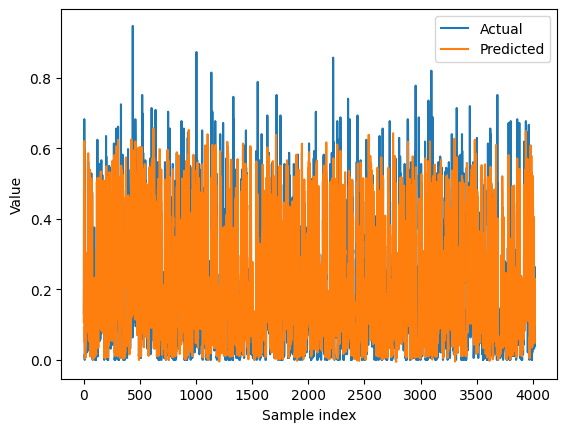

In [101]:

plt.plot(Y_test, label='Actual')
plt.plot(predictions, label='Predicted')
plt.xlabel('Sample index')
plt.ylabel('Value')
plt.legend()
plt.show()


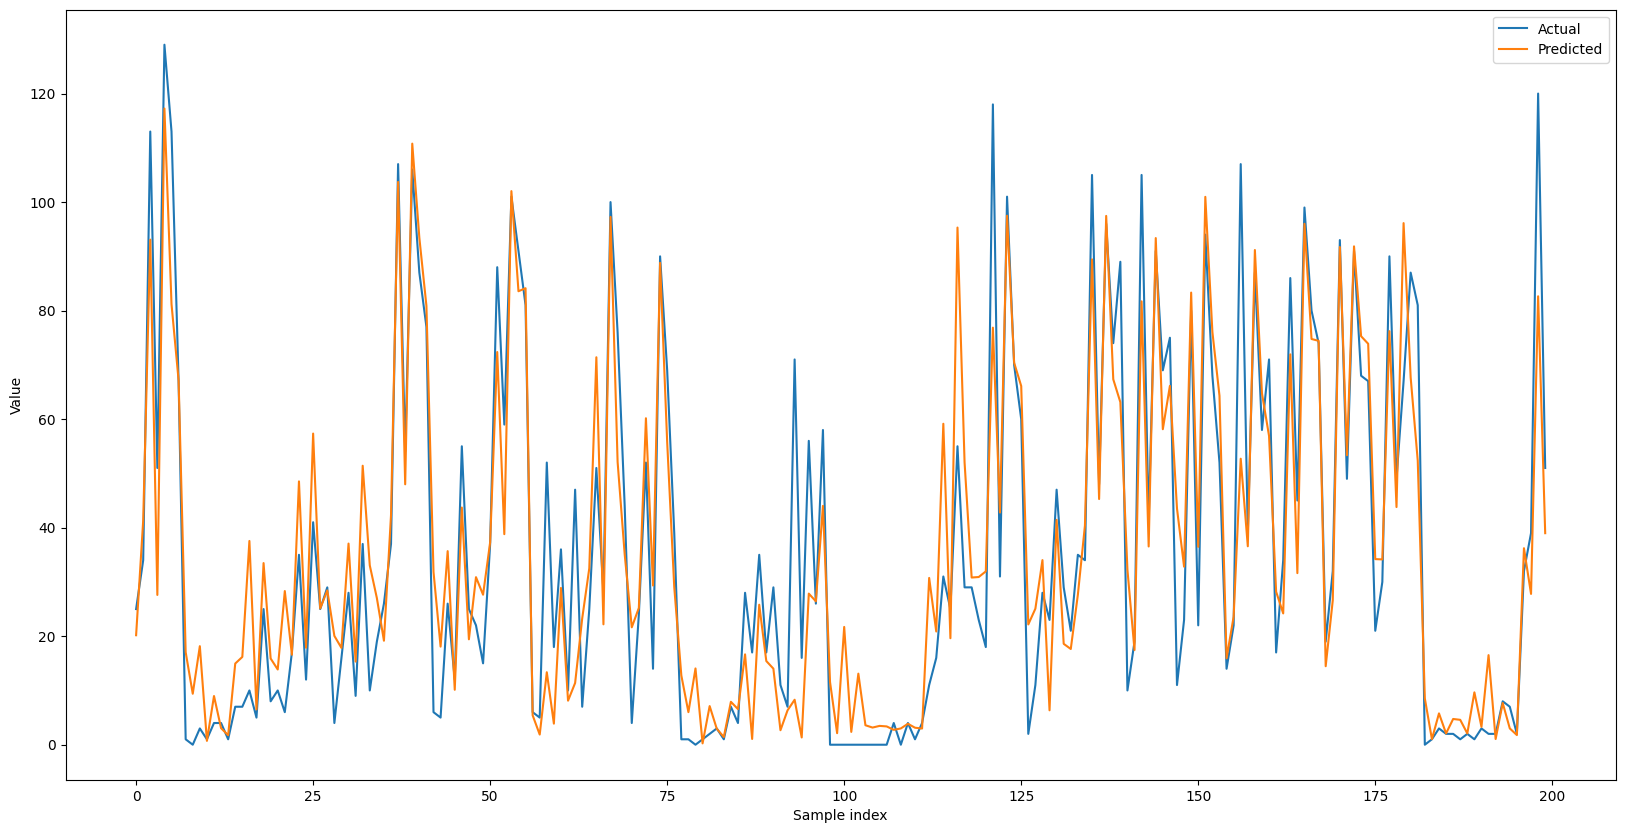

In [103]:
inversed_predictions = scaler.inverse_transform(predictions)
inversed_y_test = scaler.inverse_transform(Y_test)

plt.figure(figsize=(20, 10))
plt.plot(inversed_y_test[:200], label='Actual')
plt.plot(inversed_predictions[:200], label='Predicted')
plt.xlabel('Sample index')
plt.ylabel('Value')
plt.legend()
plt.show()


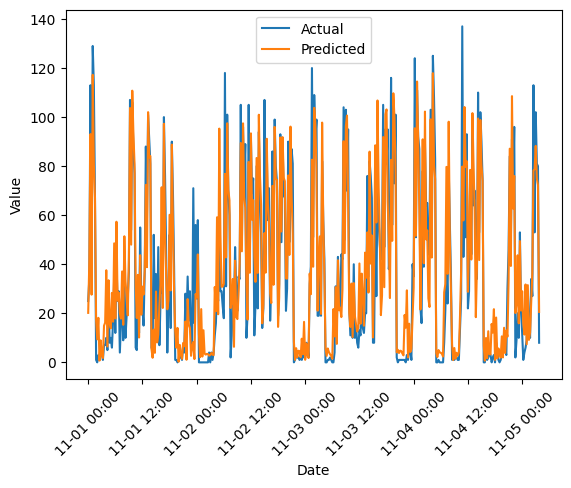

In [120]:

import matplotlib.dates as mdates

num_results = 400
timestamps_to_plot = timestamps[:num_results]

fig, ax = plt.subplots()
ax.plot(timestamps_to_plot, inversed_y_test[:num_results], label='Actual')
ax.plot(timestamps_to_plot, inversed_predictions[:num_results], label='Predicted')

# Format the x-axis
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d %H:%M'))
plt.xticks(rotation=45)  # Rotate the x-axis labels for better readability

plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()